In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [29]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [31]:
# Import the dataset
df = pd.read_csv('/Users/home/Downloads/US_Accidents_Dec19.csv')
    

In [32]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [33]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
#df.info()

In [34]:
# deal with outliers

# Drop rows with negative time durations

# Check if there is any negative time_duration values
df[td][df[td]<=0]

69719      -0.0
69720      -0.0
69721      -0.0
69722      -1.0
69723      -1.0
309387    -30.0
309388    -30.0
628436    -12.0
628472    -31.0
628489     -0.0
628923    -14.0
628942     -0.0
628943    -30.0
1265261   -30.0
1265262   -31.0
2002026   -30.0
2002111   -30.0
2002112   -31.0
2565229   -34.0
2565705    -7.0
2565708    -7.0
2693474   -31.0
Name: Time_Duration(min), dtype: float64

In [35]:
# Drop the rows with td<0

neg_outliers=df[td]<=0

# Set outliers to NAN
df[neg_outliers] = np.nan

# Drop rows with negative td
df.dropna(subset=[td],axis=0,inplace=True)

In [37]:
# double check to make sure no more negative td
df[td][df[td]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [38]:
# Deal with outliers

# B. Fill outliers with median values

# Remove outliers for Time_Duration(min): n * standard_deviation (n=3), backfill with median

n=3

median = df[td].median()
std = df[td].std()
outliers = (df[td] - median).abs() > std*n

# Set outliers to NAN
df[outliers] = np.nan

# Fill NAN with median
df[td].fillna(median, inplace=True)


In [39]:
# Print time_duration information
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'
      .format(df[td].max(),round(df[td].max()/60), round(df[td].max()/60/24), df[td].min()))

Max time to clear an accident: 11080.0 minutes or 185 hours or 8 days; Min to clear an accident td: 1.0 minutes.


In [40]:
# Export the clean data
df.to_csv('/Users/home/Downloads/US_Accidents_Dec19_clean.csv',index=False)

In [42]:
# Set the list of features to include in Machine Learning
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']
feature_lst

['Source',
 'TMC',
 'Severity',
 'Start_Lng',
 'Start_Lat',
 'Distance(mi)',
 'Side',
 'City',
 'County',
 'State',
 'Timezone',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Hour',
 'Weekday',
 'Time_Duration(min)']

In [43]:
# Select the dataset to include only the selected features
df_sel=df[feature_lst].copy()
#df_sel.info()

In [44]:
# Export the data with selected features
df_sel.to_csv('/Users/home/Downloads/US_Accidents_Dec19_clean_sel.csv',index=False)

In [45]:
# Drop rows with missing values

# Check missing values
df_sel.isnull().mean()

Source                0.000196
TMC                   0.244799
Severity              0.000196
Start_Lng             0.000196
Start_Lat             0.000196
Distance(mi)          0.000196
Side                  0.000196
City                  0.000224
County                0.000196
State                 0.000196
Timezone              0.001259
Temperature(F)        0.019033
Humidity(%)           0.020079
Pressure(in)          0.016372
Visibility(mi)        0.022271
Wind_Direction        0.015352
Weather_Condition     0.022353
Amenity               0.000196
Bump                  0.000196
Crossing              0.000196
Give_Way              0.000196
Junction              0.000196
No_Exit               0.000196
Railway               0.000196
Roundabout            0.000196
Station               0.000196
Stop                  0.000196
Traffic_Calming       0.000196
Traffic_Signal        0.000196
Turning_Loop          0.000196
Sunrise_Sunset        0.000227
Hour                  0.000196
Weekday 

In [46]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(2181347, 34)

In [49]:
# Double check missing values are all gone
df_sel.isnull().mean()

Source                0.0
TMC                   0.0
Severity              0.0
Start_Lng             0.0
Start_Lat             0.0
Distance(mi)          0.0
Side                  0.0
City                  0.0
County                0.0
State                 0.0
Timezone              0.0
Temperature(F)        0.0
Humidity(%)           0.0
Pressure(in)          0.0
Visibility(mi)        0.0
Wind_Direction        0.0
Weather_Condition     0.0
Amenity               0.0
Bump                  0.0
Crossing              0.0
Give_Way              0.0
Junction              0.0
No_Exit               0.0
Railway               0.0
Roundabout            0.0
Station               0.0
Stop                  0.0
Traffic_Calming       0.0
Traffic_Signal        0.0
Turning_Loop          0.0
Sunrise_Sunset        0.0
Hour                  0.0
Weekday               0.0
Time_Duration(min)    0.0
dtype: float64

In [48]:
# Export the data with selected features

df_sel.to_csv('/Users/home/Downloads/US_Accidents_Dec19_clean_sel_dropna.csv',index=False)

In [81]:
# Set state of interest
state='CO'

# Select the state of Florida
df_state=df_sel.loc[df_sel.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26581 entries, 512562 to 2245730
Data columns (total 33 columns):
Source                26581 non-null object
TMC                   26581 non-null float64
Severity              26581 non-null float64
Start_Lng             26581 non-null float64
Start_Lat             26581 non-null float64
Distance(mi)          26581 non-null float64
Side                  26581 non-null object
City                  26581 non-null object
County                26581 non-null object
Timezone              26581 non-null object
Temperature(F)        26581 non-null float64
Humidity(%)           26581 non-null float64
Pressure(in)          26581 non-null float64
Visibility(mi)        26581 non-null float64
Wind_Direction        26581 non-null object
Weather_Condition     26581 non-null object
Amenity               26581 non-null float64
Bump                  26581 non-null float64
Crossing              26581 non-null float64
Give_Way              26581 non-null

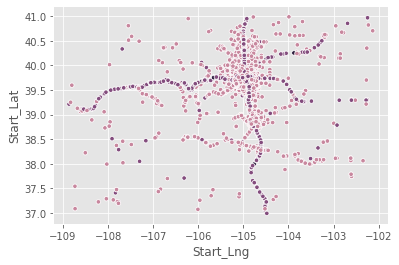

In [86]:
# Map of accidents, color code by Severity

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='Severity', legend=False, s=20)
plt.show()

In [83]:
# Set county
county='Denver'

# Select the state of Pennsylvania
df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)

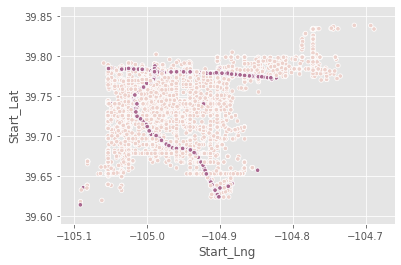

In [85]:
# Map of accidents, color code by Severity

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_county, hue='Severity', legend=False, s=20)
plt.show()

In [88]:
# Deal with categorical data: pd.get_dummies()

# Generate dummies for categorical data
df_county_dummy = pd.get_dummies(df_county,drop_first=True)

# Export data
df_county_dummy.to_csv('/Users/home/Downloads/US_Accidents_Dec19_{}_dummy.csv'.format(state),index=False)

df_county_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8738 entries, 513226 to 2245701
Columns: 101 entries, TMC to Weekday_Wed
dtypes: float64(24), uint8(77)
memory usage: 2.3 MB


In [89]:
# Predict the accident severity with various supervised machine learning algorithms

# Assign the data
df=df_county_dummy

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
y = df[target]
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [90]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

In [91]:
# Step 9. Predict the accident severity with various supervised machine learning algorithms

# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

/Users/home/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Logistic regression algorithm] accuracy_score: 0.828.


In [92]:
# Algorithm A. Logistic Regression

# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

/Users/home/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/home/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Logistic regression algorithm] accuracy_score: 0.828.


In [93]:
# Algorithm B. The K-Nearest Neighbors (KNN) algorithm

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.749.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.749.


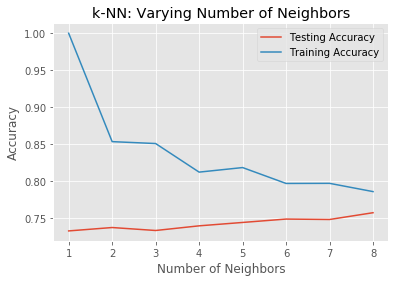

In [94]:
# Optmize the number of neighors: plot the accuracy versus number of neighbors

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, n_neighbor in enumerate(neighbors):
    
    # Setup a k-NN Classifier with n_neighbor
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [95]:
# Algorithm C. Decision Tree

# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))


# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))


[Decision Tree -- entropy] accuracy_score: 0.835.
[Decision Tree -- gini] accuracy_score: 0.838.


In [96]:
# Algorithm D. Random Forest

# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.891.


No handles with labels found to put in legend.


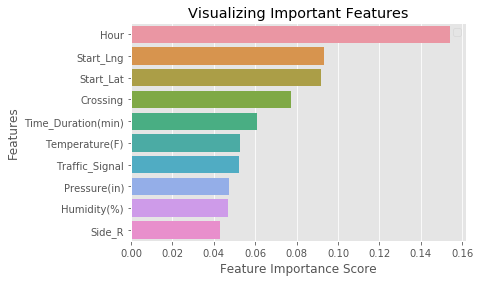

In [97]:
# Visualize the important features

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [98]:
# List top k important features
k=20
feature_imp.sort_values(ascending=False)[:k]

Hour                               0.154034
Start_Lng                          0.093124
Start_Lat                          0.091707
Crossing                           0.077087
Time_Duration(min)                 0.061071
Temperature(F)                     0.052793
Traffic_Signal                     0.052058
Pressure(in)                       0.047509
Humidity(%)                        0.047066
Side_R                             0.042926
TMC                                0.041655
Visibility(mi)                     0.030656
Distance(mi)                       0.023286
Stop                               0.016526
Weekday_Sun                        0.007120
Weekday_Sat                        0.007041
Sunrise_Sunset_Night               0.007035
Weekday_Wed                        0.006778
Weather_Condition_Mostly Cloudy    0.006646
Weekday_Tue                        0.006520
dtype: float64

In [99]:
# Select the top important features, set the threshold¶

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])


TMC
Start_Lng
Start_Lat
Temperature(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Crossing
Traffic_Signal
Hour
Time_Duration(min)
Side_R


In [100]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [101]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Full feature] accuracy_score: 0.891.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.903.


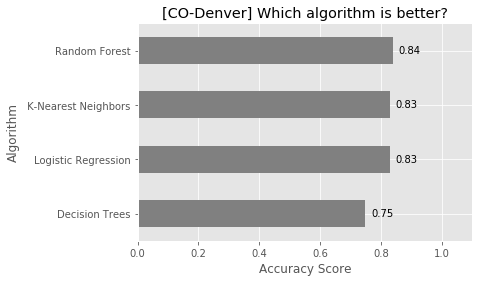

In [102]:
# Plot the accuracy score versus algorithm¶

# Make a plot of the accuracy scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Export to a file
df_acc.to_csv('./Accuracy_scores_algorithms_{}.csv'.format(state),index=False)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('[{}-{}] Which algorithm is better?'.format(state, county))

plt.show()

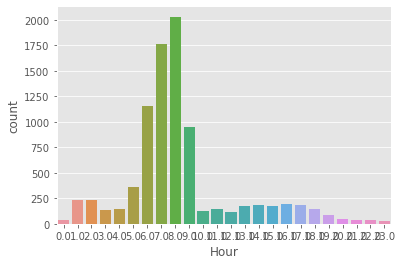

In [188]:
hours = df.Hour

#print(dates)
sns.countplot(hours, label="Hour")

In [151]:
hist,bin_edges = np.histogram(df['Temperature(F)'])


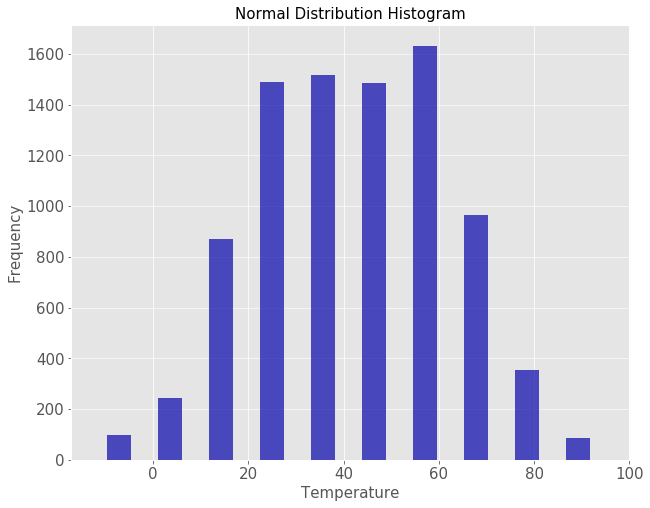

In [184]:
plt.figure(figsize=[10,8])

plt.bar(bin_edges[:-1], hist, width = 5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges -10), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Temperature',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

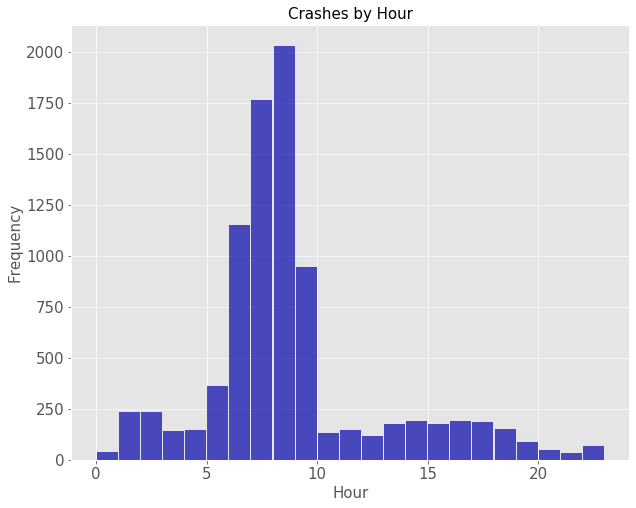

In [186]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=hours, bins=23, color='#0504aa',alpha=0.7, rwidth=0.95)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hour',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Crashes by Hour',fontsize=15)
plt.show()

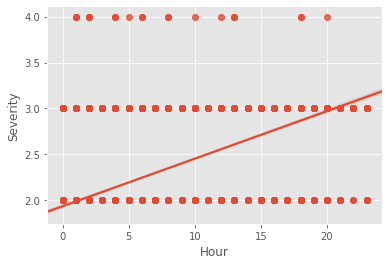

In [174]:
Axes.hist(self, x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)[source]